In [88]:
%pip install sounddevice soundfile


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 25.1.1
[notice] To update, run: C:\Users\Patricia\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [89]:
import numpy as np
import matplotlib.pyplot as plt
import time
import matplotlib.ticker as ticker
import sounddevice as sd
import soundfile as sf
from scipy.signal import butter, filtfilt
from IPython.display import Audio



In [90]:
# Ex1
f = 2e3
fs = 44100
t = np.arange(start=1,stop=10,step=1/fs)
w = 2*np.pi*f
sinal_informacao = np.sin(w*t)

f2 = 15e3
w2 = 2*np.pi*f2
sinal_portadora = np.sin(w2*t)


sinal_total = sinal_portadora + sinal_informacao

In [91]:
def calcula_crescente(magnitude:np.array, freqs:np.array,n:int=2):
    #precisa fazer uma copia pois está salvo no mesmo bloco de memoria, fazendo com que o resultado seja alterado
    magnitude = magnitude.copy()
    #magnitude é o array que contém todos os pontos com as magnitudes identificadas pela fft
    #n é o numero de senoides 

    dic = {}
    i = 0
    while i < n:
        index = np.argmax(magnitude)
        print(index)
        maior = magnitude[index]
        dic[freqs[index]] = maior
        magnitude[index] = 0
        i+=1
        
    return dic

In [92]:
def plot_fft(sinal, fs):
    """
    Plota o gráfico da Transformada de Fourier (FFT) de um sinal.

    Parâmetros:
    - sinal: lista ou array com os valores do sinal no tempo
    - fs: taxa de amostragem em Hz
    """
    # Converter sinal para array NumPy
    sinal = np.array(sinal)
    
    # Número de amostras e vetor de tempo
    N = len(sinal)
    t = np.arange(N) / fs

    # FFT e cálculo da magnitude
    fft_result = np.fft.fft(sinal)
    freqs = np.fft.fftfreq(N, d=1/fs)
    magnitude = np.abs(fft_result)

    # Manter só metade do espectro (frequências positivas)
    half_N = N // 2
    freqs = freqs[:half_N]
    magnitude = magnitude[:half_N]

    picos = calcula_crescente(magnitude=magnitude, freqs=freqs, n=2)
    picos_f = list(picos.keys())
    nulos = [0]*len(picos_f)


    
    continua=True
    if continua:

        # Plot do sinal no tempo (opcional)
        plt.figure(figsize=(12, 4))

        plt.subplot(1, 2, 1)
        plt.plot(t, sinal)
        plt.title("Sinal no tempo")
        plt.xlabel("Tempo (s)")
        plt.ylabel("Amplitude")
        plt.grid(True)

        # Plot do espectro de frequência
        ax = plt.subplot(1, 2, 2)
        ax.stem(freqs, magnitude, basefmt=" ")
        ax.minorticks_on()
        ax.xaxis.set_minor_locator(ticker.FixedLocator(picos_f))
        # ax.set_xticks(picos_f, minor=True)
        ax.tick_params(axis="x",which="minor",length=8, color="black", bottom=True)
        plt.plot(picos_f,nulos, "ro",markersize=8, color='red',label="Picos")
        plt.title("Transformada de Fourier (FFT)")
        plt.xlabel("Frequência (Hz)")
        ax.legend()
        plt.ylabel("Magnitude")
        plt.grid(True)

135000
18000


C:\Users\Patricia\AppData\Local\Temp\ipykernel_18820\1342559293.py:52: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ro" (-> color='r'). The keyword argument will take precedence.
  plt.plot(picos_f,nulos, "ro",markersize=8, color='red',label="Picos")


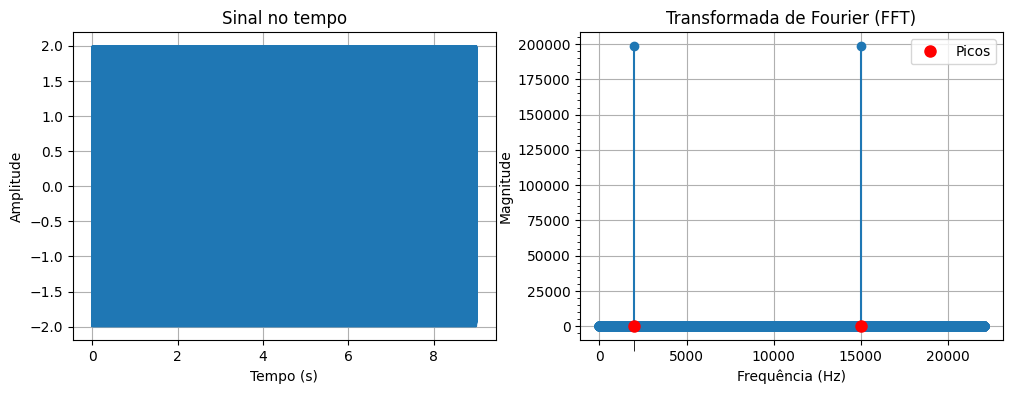

In [93]:
plot_fft(sinal=sinal_total,fs=fs)


In [94]:
# Ex2
valor_minimo= 15e3 - 2e3
valor_maximo = 15e3 + 2e3
print(f"a banda minima é no intervalo [{valor_minimo:.0f}, {valor_maximo:.0f}] Hz ")

a banda minima é no intervalo [13000, 17000] Hz 


153000
117000


C:\Users\Patricia\AppData\Local\Temp\ipykernel_18820\1342559293.py:52: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ro" (-> color='r'). The keyword argument will take precedence.
  plt.plot(picos_f,nulos, "ro",markersize=8, color='red',label="Picos")


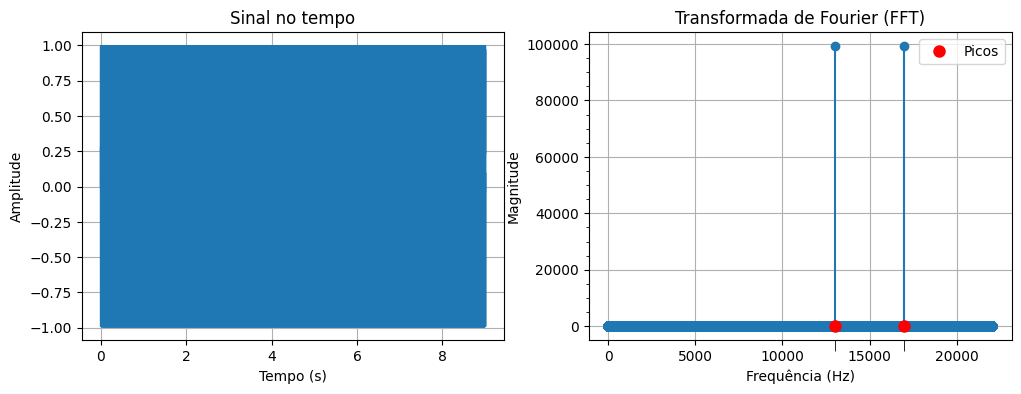

In [95]:
#Ex3
sinal_multiplicado = sinal_portadora * sinal_informacao
plot_fft(sinal=sinal_multiplicado, fs=fs)


Podemos ver que os picos identificados pelo fft estão agora nas bandas de frequencias que queremos. Podemos verificar isso pelos gráficos : 

#### EX4
Para que fique na frequência adequada, devemos fazer a balisa por meio da tecnica FM, em que fazemos com que a frequencia de 15kHz, mas com amplitudes seguindo as senoides compostas, que fazem com que fique com a amplitude das ondas diversas senoidais fiquem moduladas com essa amplitude, mas a frequencia seja da onda que pode ser comportada.

In [96]:
# numa célula do notebook, rode:
%pip install soundcard soundfile


Note: you may need to restart the kernel to use updated packages.Requirement already satisfied: soundcard in c:\users\patricia\appdata\local\packages\pythonsoftwarefoundation.python.3.11_qbz5n2kfra8p0\localcache\local-packages\python311\site-packages (0.4.4)




[notice] A new release of pip is available: 24.2 -> 25.1.1
[notice] To update, run: C:\Users\Patricia\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [97]:
#Ex5

### Gravando o Audio

In [98]:
gravar = True
#Função que grava e salva num arquivo um audio que está rodando. 
# A frequencia de amostras é de 44100, pelo fato de ser duas vezes mais do que ouvimos -> CORRETO?
def grava_e_salva(filename="whatoncewas.wav", duration=5, fs=44100, canais=1):
    """
    Grava audio do dispositivo padrão (microfone ou Stereo Mix)
    e salva em um arquivo WAV.

    filename: nome do arquivo de saída (.wav)
    duration: duração em segundos
    fs: taxa de amostragem em Hz
    canais: número de canais (1=mono, 2=stereo)
    """
    print(f"Iniciando gravação de {duration}s a {fs}Hz...")
    grava = sd.rec(int(duration * fs), samplerate=fs, channels=canais, dtype='float32')
    sd.wait()  # aguarda término da gravação
    print("Gravação concluída, salvando em:", filename)
    sf.write(filename, grava, fs)
    print("Arquivo salvo com sucesso!")

# Exemplo de uso:
if gravar:
    grava_e_salva(filename="whatoncewas.wav", duration=20, fs=44100, canais=1)
    gravar = False


Iniciando gravação de 20s a 44100Hz...
Gravação concluída, salvando em: whatoncewas.wav
Arquivo salvo com sucesso!


28799
28798


C:\Users\Patricia\AppData\Local\Temp\ipykernel_18820\1342559293.py:52: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ro" (-> color='r'). The keyword argument will take precedence.
  plt.plot(picos_f,nulos, "ro",markersize=8, color='red',label="Picos")


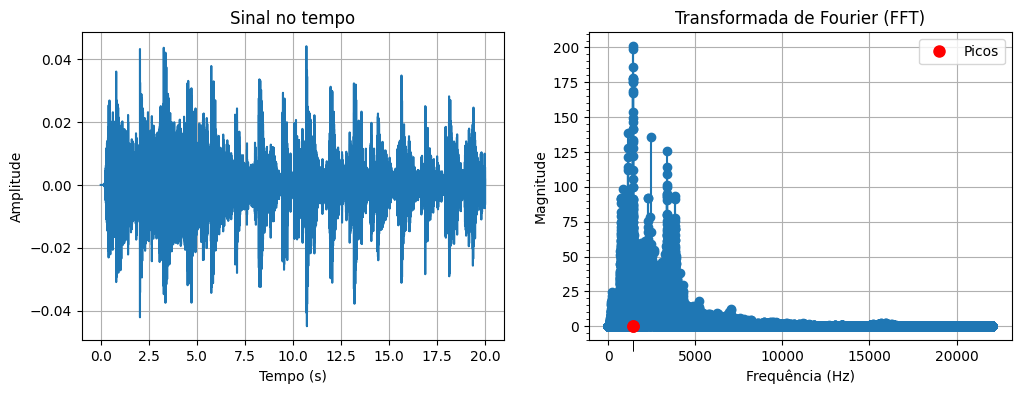

In [99]:
sinal_musica, fs = sf.read("whatoncewas.wav")
plot_fft(sinal_musica, fs)

In [100]:
#Etapa 2 Ex 5: 
#Para criar um sinal da portadora com o mesmo numero de amostras, basta ter a mesma taxa de amostragem que tem o mesmo numero de pontos, 
# para que tenha o mesmo periodo. Ou seja : T = N/Fs, pois assim garantimos que o periodo é o mesmo 
N = len(sinal_musica)

#fs define quantos pontos por segundo -> todos os pontos que estão na função
#fc define quantos ciclos essa onda fará por segundo -> quantas vezes eu percorro o ciclo trigonometrico 

#Explicação mais clara: Em um segundo teremos fs*t pontos. Nesse mesmo segundo a senoide fará fc ciclos.

# em codigo usamos o np.arange: 
t = np.arange(N)/fs #-> basicamente pensar que é a quantidade de informações que iremos capitar por cada t que será multiplicado na função seno

#Isso nos garante a quantidade de informações que serão passadas por ciclo na função, ou seja, basicamente em uma função que estamos analisando intenisdade por tempo, estamos vendo o periodo. 
#Assim, com isso feito temos a quantidade de informações por segundo que será transimitida pela onda

#criando a frequencia da portadora: 
fc = 16e3
w = 2*np.pi*fc #frequencia angular da portadora, então basicamente é o que irá controlar o número de voltas por segundo da onda
sinal_portadora = np.sin(w*t)

### Sinal da portadora 

320000
319999


C:\Users\Patricia\AppData\Local\Temp\ipykernel_18820\1342559293.py:52: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ro" (-> color='r'). The keyword argument will take precedence.
  plt.plot(picos_f,nulos, "ro",markersize=8, color='red',label="Picos")


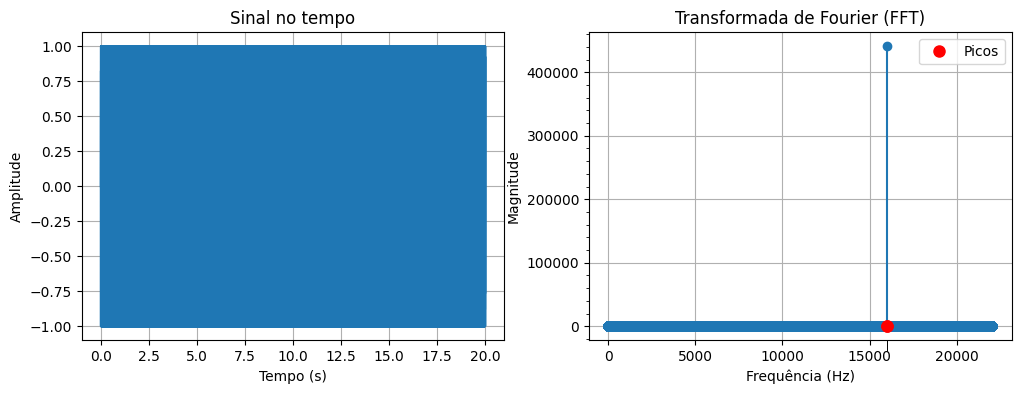

In [101]:
plot_fft(sinal_portadora,fs=fs)

In [102]:
#ETAPA 4 EX5
#Para fazer a modulação AM, basta multiplicar as ondas, para que a função fique com a amplitude que contém as informações
#Desejadas a serem passadas, mas com as frequências da onda, que justamente nos garante a banda da qual estaremos.
# S = (1/2 Ac * Am){[sin(2*pi*fc + 2*pi*fm)*t + phi] + sin[(2*pi*fc - 2*pi*fm)*t + phi]}

# Assim, a amplitude fica adequada com o que desejamos.

# Tratando o sinal: Basta multiplicar por uma outra função seno que esteja dentro do intervalo desejado

#Filtro passa baixa :
def passa_baixa(sinal,fc,fs,ordem):
    #projeta um filtro digital do tipo butterworth
    b_lp, a_lp = butter(N=ordem, Wn=fc/(fs/2), btype='low')
    y = filtfilt(b_lp,a_lp,sinal)
    return y

### Sinal da musica filtrado no passa baixa

28799
28798


C:\Users\Patricia\AppData\Local\Temp\ipykernel_18820\1342559293.py:52: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ro" (-> color='r'). The keyword argument will take precedence.
  plt.plot(picos_f,nulos, "ro",markersize=8, color='red',label="Picos")


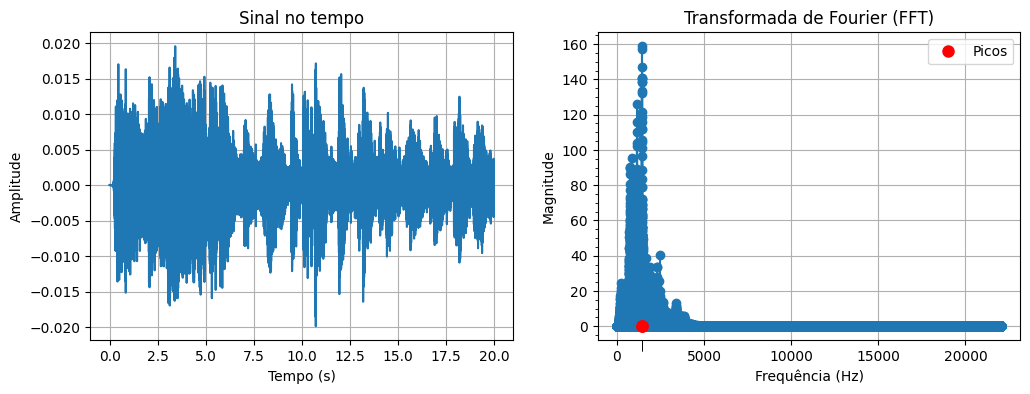

In [103]:
sinal_filtrado = passa_baixa(sinal_musica,2e3,44100,2)

plot_fft(sinal_filtrado, fs=fs)

### Sinal modulado: Sinal da musica filtrado e adequado para a portadora, estando dentro da banda, como os intervalos mostram

348799
291201


C:\Users\Patricia\AppData\Local\Temp\ipykernel_18820\1342559293.py:52: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ro" (-> color='r'). The keyword argument will take precedence.
  plt.plot(picos_f,nulos, "ro",markersize=8, color='red',label="Picos")


(14000.0, 18000.0)

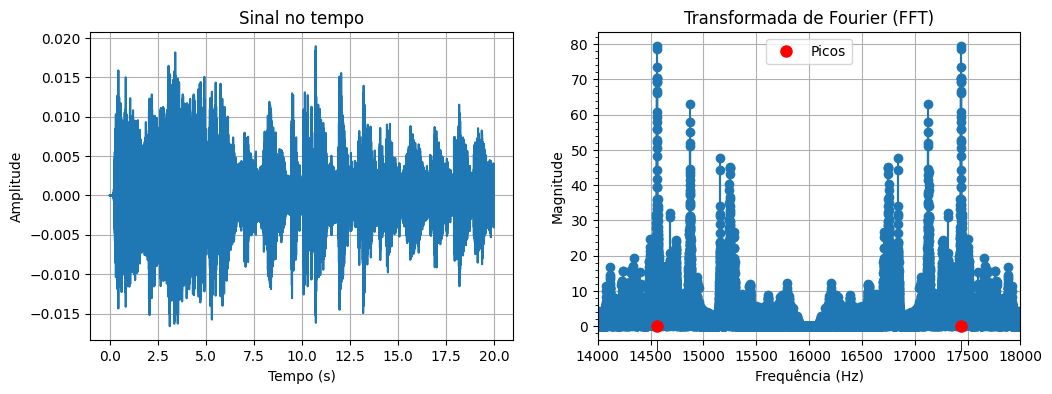

In [104]:
sinal_total = sinal_filtrado*sinal_portadora
plot_fft(sinal_total,fs=fs)
plt.xlim(14000,18000)

In [105]:
Audio(sinal_musica, rate=fs)

In [106]:
Audio(sinal_filtrado, rate=fs)


In [107]:
Audio(sinal_total, rate=fs)

### Demodulação

In [108]:
#Efetuando a etapa de multiplicar o sinal modulado pelo da portadora para que seja possível demodular o sinal.
sinal_demodulado = sinal_total*sinal_portadora

28799
28798


C:\Users\Patricia\AppData\Local\Temp\ipykernel_18820\1342559293.py:52: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ro" (-> color='r'). The keyword argument will take precedence.
  plt.plot(picos_f,nulos, "ro",markersize=8, color='red',label="Picos")


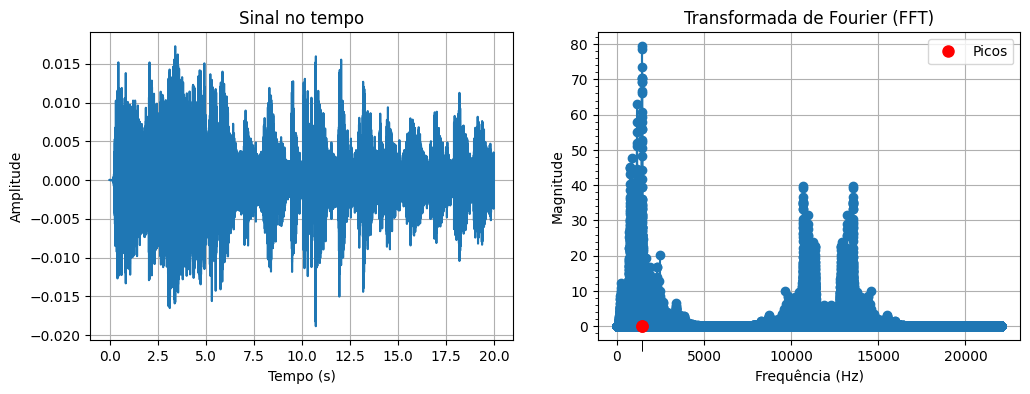

In [109]:
plot_fft(sinal_demodulado,fs)

Podemos ver que evidentemente o maior ponto de pico foi exatamente onde a musica inicialmente tinha se mostrado, então, realmente basta fazer um passa baixa que iremos ter a frequencia na qual a música está com maior amplitude.

22593
22599


C:\Users\Patricia\AppData\Local\Temp\ipykernel_18820\1342559293.py:52: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ro" (-> color='r'). The keyword argument will take precedence.
  plt.plot(picos_f,nulos, "ro",markersize=8, color='red',label="Picos")


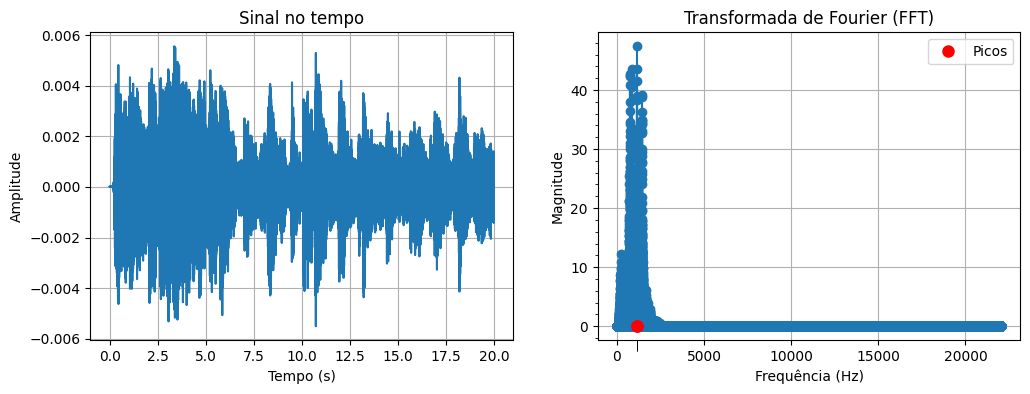

In [113]:
#Filtrando o sinal passa baixa, demodulando ele completamente:
sinal_demodulado_2 = passa_baixa(sinal_demodulado,fc=2000,fs=fs,ordem=2)

#Plot do fft para identificar se as altas frequencias foram embora :
plot_fft(sinal_demodulado_2, fs=fs)

Por meio dos gráficos, é possível ver que o sinal voltou para o seu pico novamente, retirando tudo que estava em alta frequencia, assim como as equações nos indicaram e o gráfico está muito proximo do que estava antes de ser modulado.

In [114]:
#Executando o sinal demodulado para comparar se é exatamente igual : 
Audio(sinal_demodulado_2,rate=fs)

### `POR QUE ESTÁ DIFERENTE ? O OUTRO SOM ESTAVA MAIS "CLEAN"`